In [ ]:
pip install lime

In [177]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from sklearn import model_selection, svm, preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from skimage.segmentation import mark_boundaries
from tensorflow.keras.models import Model
from matplotlib.pyplot import figure

In [13]:
from keras.datasets import cifar10
from keras.utils import to_categorical

In [14]:
(train_img, train_label), (test_img, test_label) = cifar10.load_data()

In [4]:
train_labels = to_categorical(train_label, dtype='int16',num_classes=10)
test_labels = to_categorical(test_label, dtype='int16',num_classes=10)

In [5]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (train_img.shape, train_label.shape))
print('Test: X=%s, y=%s' % (test_img.shape, test_label.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [6]:
# convert from integers to floats
train_norm = np.array(train_img, dtype=np.float32)
test_norm =  np.array(test_img, dtype=np.float32)

train_images = np.array(train_norm) / 255.0
test_images = np.array(test_norm) / 255.0

In [7]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np


In [8]:
base_model = VGG16(input_shape=(32,32,3),include_top=False,weights='imagenet')

58892288/58889256 [==============================] - 0s 0us/step


In [9]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(10, activation='softmax')(x)

In [10]:
model = Model(inputs=base_model.input, outputs=predictions)

In [11]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.load_weights('/content/drive/MyDrive/DAI_Assignment3/vgg16_ass3.h5')

In [22]:
model.fit(x=train_img,y=train_labels,epochs=1,callbacks=[callback])

1563/1563 [==============================] - 3989s 3s/step - loss: 0.6568 - accuracy: 0.7859


In [24]:
loss , acc= model.evaluate(test_img,test_labels)

313/313 [==============================] - 108s 343ms/step - loss: 0.8575 - accuracy: 0.7139


In [20]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image



In [159]:
explainer = lime_image.LimeImageExplainer()

In [193]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation= explainer.explain_instance(test_images[15], model.predict, top_labels=5, hide_color=0, num_samples=10)


CPU times: user 344 ms, sys: 9.95 ms, total: 354 ms
Wall time: 254 ms


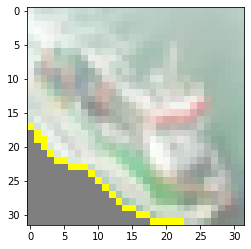

In [209]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=True, num_features=2, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask)) 

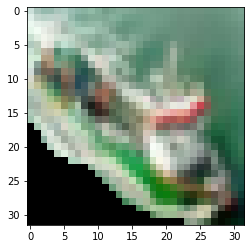

In [210]:
plt.imshow(temp)

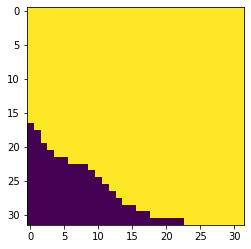

In [211]:
plt.imshow(mask)

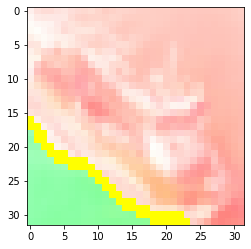

In [206]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask)) 

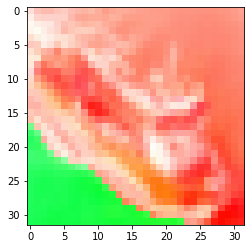

In [207]:
plt.imshow(temp)

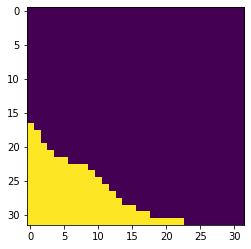

In [208]:
plt.imshow(mask)

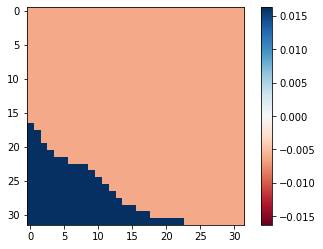

In [190]:

#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 7.63 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.54 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs



CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 12 µs, sys: 1e+03 ns, total: 13 µs
Wall time: 16.2 µs



CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs



CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs



CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.34 µs



CPU times: user 0 ns, sys: 29 µs, total: 29 µs
Wall time: 34.8 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 28.4 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs



CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 34 µs, sys: 0 ns, total: 34 µs
Wall time: 37.7 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.2 µs



CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs



CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.34 µs



CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 79.6 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs



CPU times: user 40 µs, sys: 0 ns, total: 40 µs
Wall time: 45.5 µs



CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 29.8 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs



CPU times: user 0 ns, sys: 4 µs, total: 4 µs
Wall time: 6.44 µs



CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.54 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs



CPU times: user 0 ns, sys: 3 µs, total: 3 µs
Wall time: 7.15 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs



CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 11.4 µs



CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.39 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 5.96 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs



CPU times: user 23 µs, sys: 0 ns, total: 23 µs
Wall time: 27.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs



CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs



CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 11.9 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.11 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs



CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs



CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.2 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs



CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.68 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 13.6 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs



CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.11 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs



CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.34 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs



CPU times: user 24 µs, sys: 0 ns, total: 24 µs
Wall time: 27.9 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.2 µs



CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.68 µs



CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 9.06 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs



CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs



CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.58 µs



CPU times: user 0 ns, sys: 6 µs, total: 6 µs
Wall time: 13.6 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs



CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 31.7 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs



CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.82 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs



CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs



CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.82 µs


KeyboardInterrupt: ignored

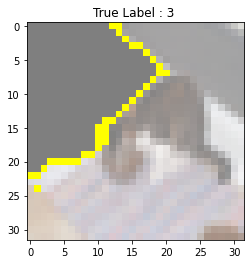

In [212]:
for i in range(1,500):
  %%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
  explanation1= explainer.explain_instance(test_images[i], model.predict, top_labels=5, hide_color=0, num_samples=10)
  temp, mask = explanation1.get_image_and_mask(explanation1.top_labels[1], positive_only=True, num_features=2, hide_rest=True)
  correct_test_label = np.argmax(test_labels[i])
  plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
  plt.title("True Label : %d "%correct_test_label)
  save_results_to = '/content/drive/MyDrive/DAI_Assignment3/result2/'
  plt.savefig(save_results_to + 'image{}.png'.format(i))

